In [1]:
import pandas as pd
import numpy as np

In [3]:
teste_list = ['TS1', 'TS2', 'TS3', 'TS4','SE', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5',
              'PS6', 'FS1', 'FS2', 'EPS1', 'CP', 'CE']

teste_list = ["data_compressed_50hz/{}_normalized.csv".format(s)
              for s in teste_list]

new_df = {}
master_df = pd.DataFrame()

for key in teste_list:
        df = pd.read_table(key, header=None)
        master_df = pd.concat([master_df, df], axis=1)

In [4]:
master_df.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,35.570,35.492,35.469,35.422,35.414,35.320,35.227,35.242,35.160,35.176,...,31.554,30.953,30.639,30.561,30.368,30.224,29.790,29.261,29.287,28.866
1,36.156,36.094,35.992,36.008,35.992,35.902,35.824,35.820,35.727,35.727,...,23.995,24.328,24.283,23.877,23.816,23.933,23.354,23.483,23.320,23.588
2,37.488,37.391,37.340,37.312,37.223,37.145,37.059,36.973,36.898,36.879,...,21.711,21.564,21.564,21.526,21.753,21.749,21.802,21.582,21.283,21.519
3,38.633,38.535,38.469,38.379,38.297,38.223,38.125,38.062,37.977,37.969,...,20.687,20.703,20.295,20.482,20.600,20.547,20.708,20.708,20.574,20.403
4,39.461,39.461,39.375,39.281,39.203,39.113,39.043,38.969,38.875,38.883,...,19.887,19.919,19.696,19.634,19.747,20.005,19.919,19.736,19.977,20.016


In [5]:
from sklearn.cluster import KMeans

In [19]:
import matplotlib.pyplot as plt

In [17]:
df_as_float = df.as_matrix().astype(np.float)

In [18]:
inertias = []

for k in range(1, 9):
    model = KMeans(n_clusters=k)
    model.fit(df_as_float)
    inertias.append(model.inertia_)

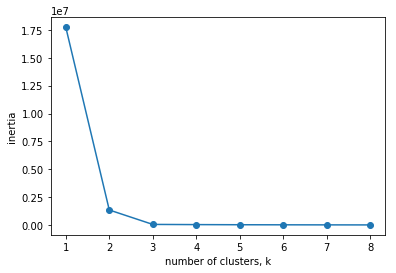

In [20]:
plt.plot(range(1, 9), inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(range(1, 9))
plt.show()

In [24]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [27]:
mergings = linkage(df_as_float, method='complete')
labels = [
    fcluster(mergings, 2, criterion='distance'),
    fcluster(mergings, 3, criterion='distance')
]

In [28]:
from sklearn.manifold import TSNE

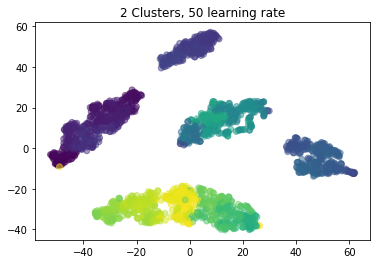

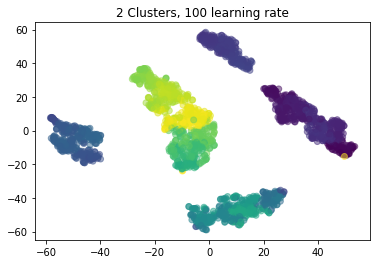

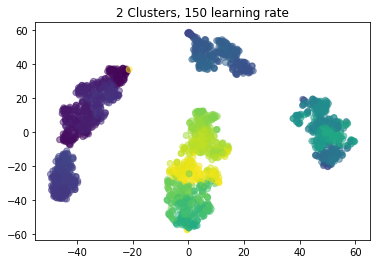

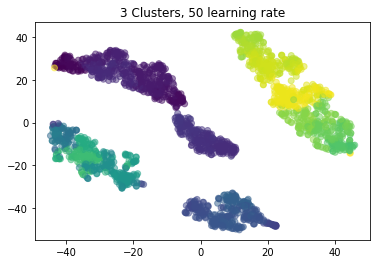

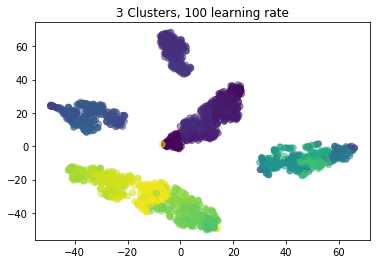

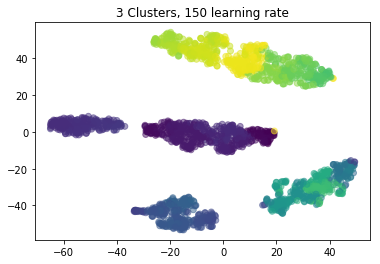

In [31]:
for n in range(2):
    learning_rates = [50, 100, 150]
    
    for rate in learning_rates:
        model = TSNE(learning_rate=rate)
        
        transformed = model.fit_transform(df_as_float)
        xs = transformed[:,0]
        ys = transformed[:,1]
        
        plt.scatter(x=xs, y=ys, c=labels[n], alpha=0.5)
        plt.title("{} Clusters, {} learning rate".format(n+2, rate))
        plt.show()